# 1. Loading & Understanding the Dataset

In [ ]:
import pandas as pd  # For data manipulation and analysis
from sklearn.cluster import KMeans  # For clustering
from sklearn.decomposition import PCA  # For dimensionality reduction
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization
from sklearn.preprocessing import StandardScaler # For data scaling

In [ ]:
# Import data from .csv file into a pandas DataFrame via Shared Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/marketing_data.csv')

Mounted at /content/drive


In [ ]:
# Display a preview of the dataset to verify successful import and understand its structure
df.head(10)

,Campaign,Channel,Sales
0,Summer Sale 2023,Social Media,556
1,Summer Sale 2023,Print Ads,748
2,Summer Sale 2023,Print Ads,940
3,Summer Sale 2023,Online Ads,671
4,Summer Sale 2023,Online Ads,426
5,Summer Sale 2023,Email,833
6,Summer Sale 2023,TV Ads,690
7,Summer Sale 2023,TV Ads,946
8,Summer Sale 2023,Online Ads,181
9,Summer Sale 2023,Online Ads,511


In [ ]:
# Display the summary statistics of the dataset for initial insights
df.describe()

,Sales
count,500.000000
mean,550.824000
std,265.061321
min,101.000000
25%,312.500000
50%,555.500000
75%,794.250000
max,998.000000


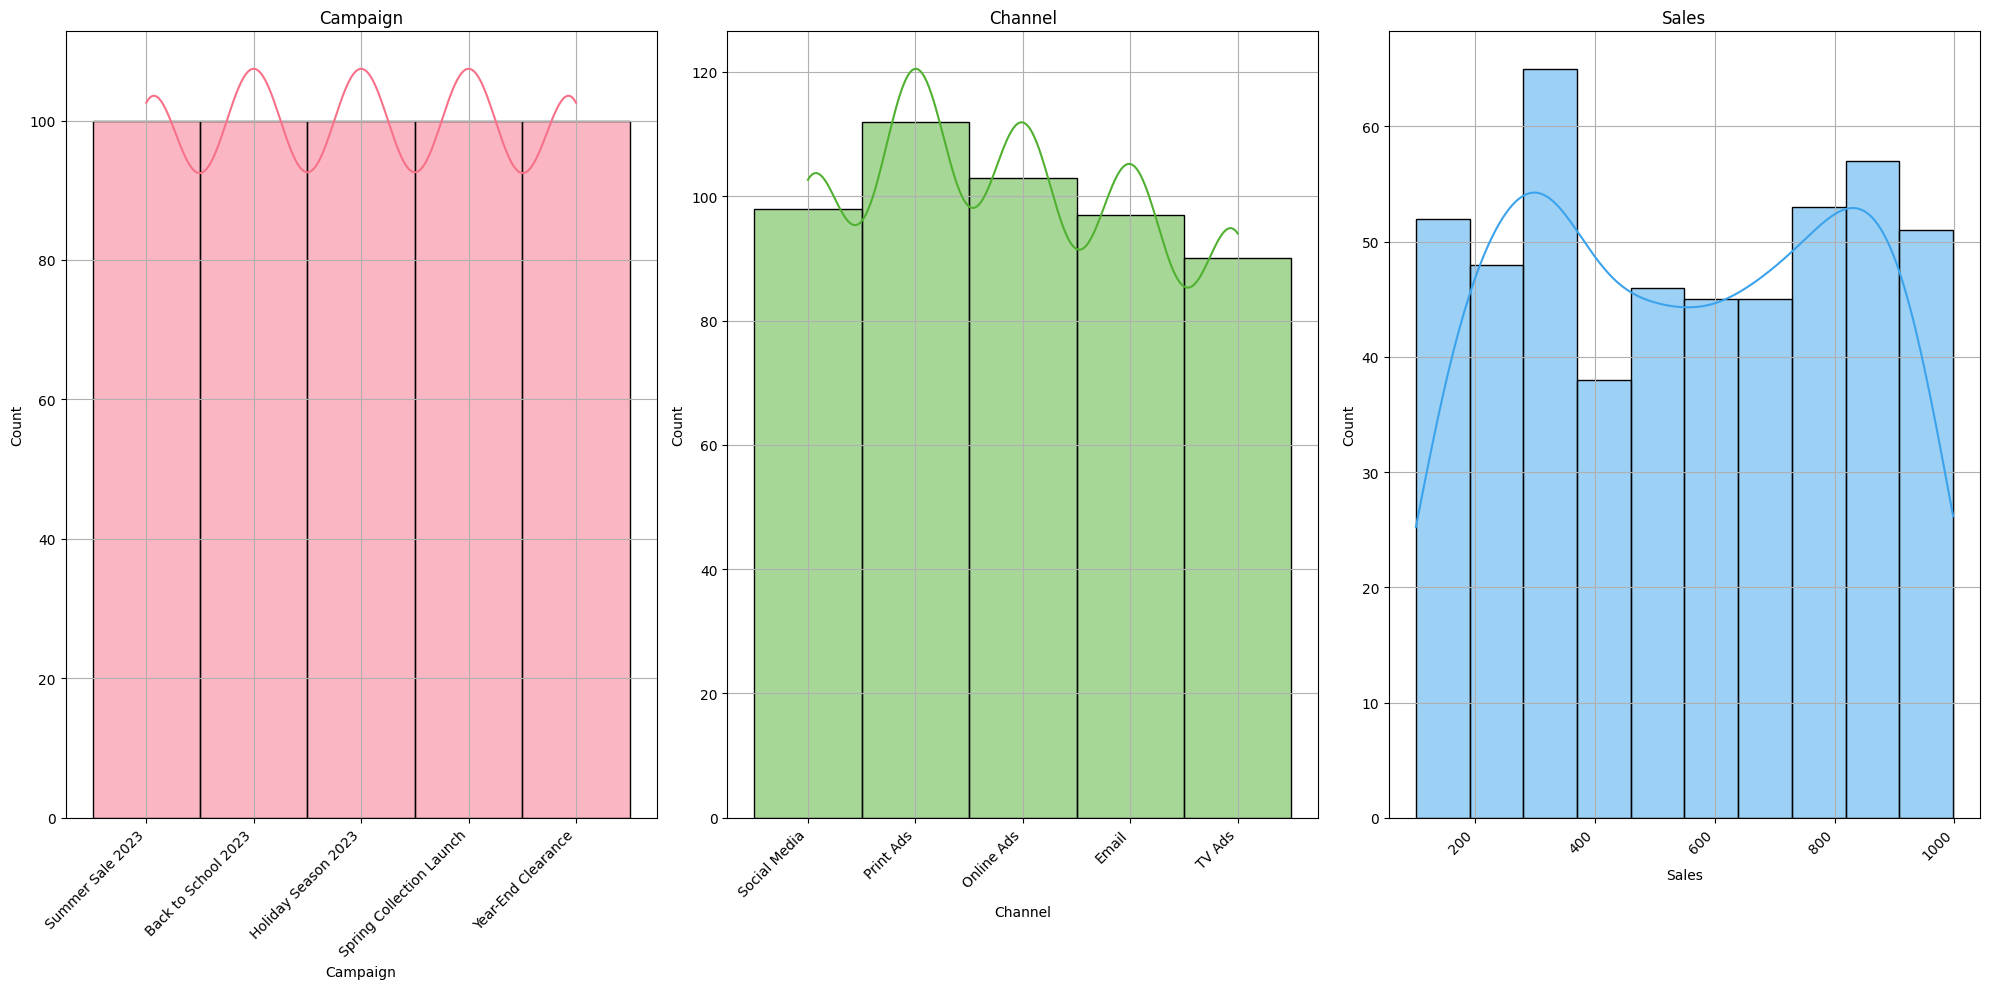

In [ ]:
# Set the overall figure size for the subplots
plt.figure(figsize=(20, 10))

# Get the list of column names
feature_columns = df.columns

# Generate a list of colors for the boxplots
colors = sns.color_palette('husl', len(feature_columns))  # Using 'husl' palette for better color differentiation

# Create a subplot for each feature in the dataset
for i, feature in enumerate(feature_columns, 1):
    # Create subplots in a single row
    plt.subplot(1, len(feature_columns), i)
    # Create a boxplot for the current feature with the specified color
    sns.histplot(data=df, x=feature, kde=True, color=colors[i-1])
    # Rotate the labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Set the title of the subplot to the feature name
    plt.title(feature)
    # Add grid lines to the subplot
    plt.grid(True)
    # Adjust the layout to prevent overlap
    plt.tight_layout()

# Display all the subplots
plt.show()

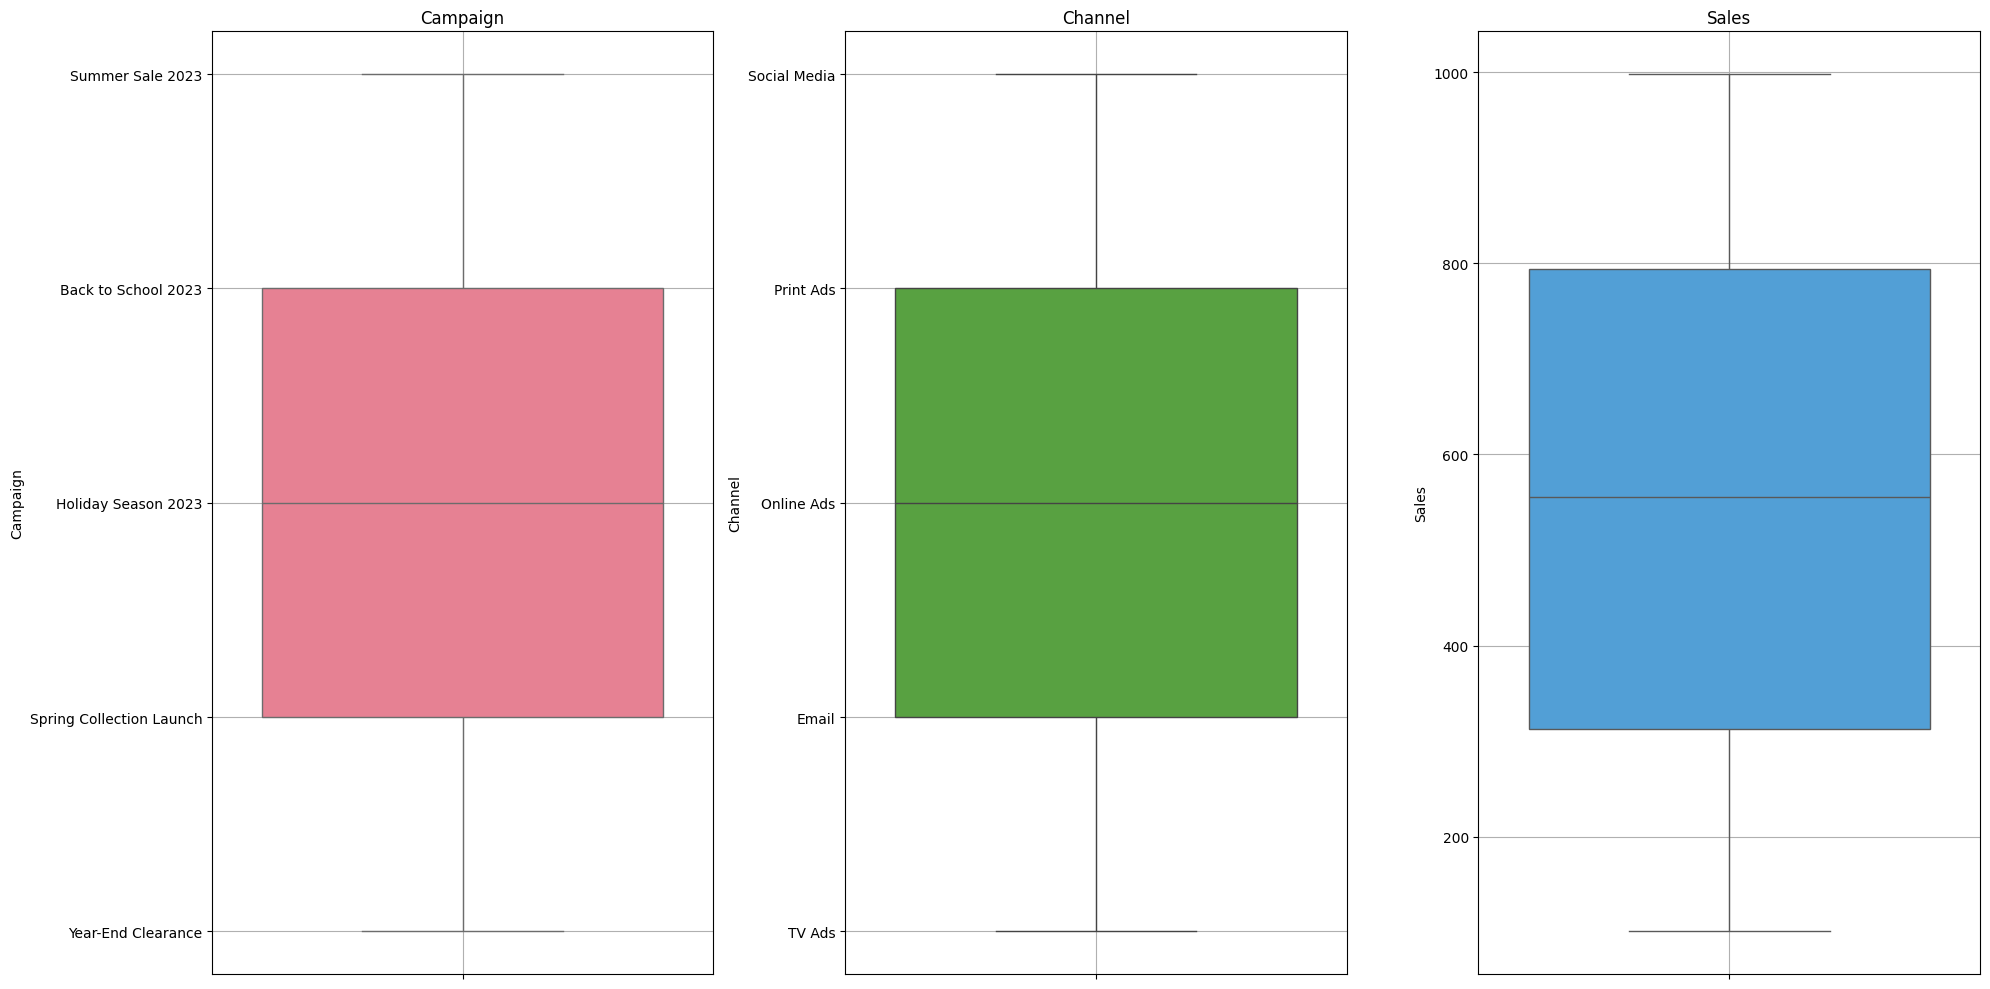

In [ ]:
# Set the overall figure size for the subplots
plt.figure(figsize=(20, 10))

# Get the list of column names
feature_columns = df.columns

# Generate a list of colors for the boxplots
colors = sns.color_palette('husl', len(feature_columns))  # Using 'husl' palette for better color differentiation

# Create a subplot for each feature in the dataset
for i, feature in enumerate(feature_columns, 1):
    # Create subplots in a single row
    plt.subplot(1, len(feature_columns), i)
    # Create a boxplot for the current feature with the specified color
    sns.boxplot(y=df[feature], color=colors[i-1])
    # Set the title of the subplot to the feature name
    plt.title(feature)
    # Add grid lines to the subplot
    plt.grid(True)
    # Adjust the layout to prevent overlap
    plt.tight_layout()

# Display all the subplots
plt.show()

# 2. Modelling

## Customer Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


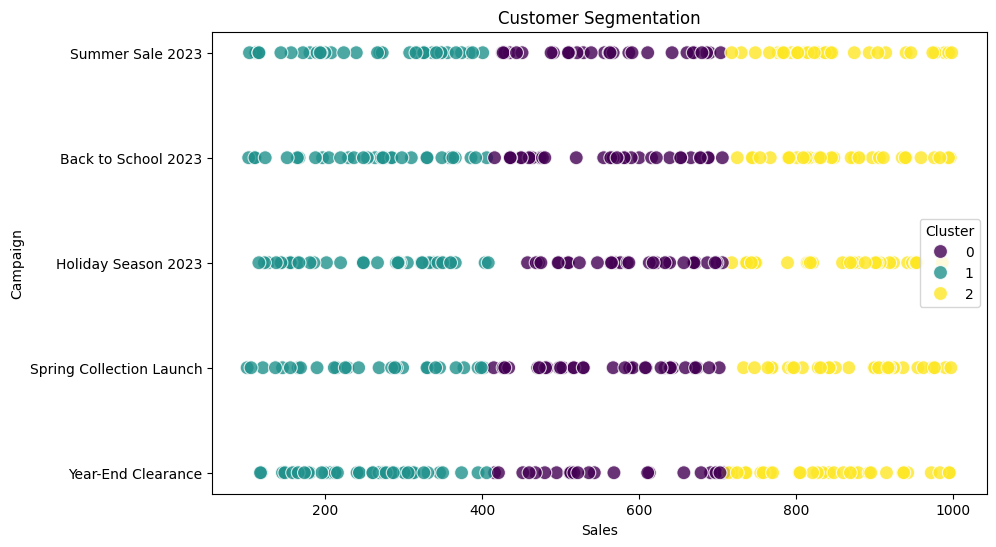

           Campaign       Channel  Sales  Cluster
0  Summer Sale 2023  Social Media    556        0
1  Summer Sale 2023     Print Ads    748        2
2  Summer Sale 2023     Print Ads    940        2
3  Summer Sale 2023    Online Ads    671        0
4  Summer Sale 2023    Online Ads    426        0


In [ ]:
# Create dummy variables for the 'Campaign' column
dummy_campaigns = pd.get_dummies(df['Campaign'], drop_first=True)

# Select the 'Sales' column as the feature for clustering
X = df[['Sales']].values

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans clustering with 3 clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans clustering on the scaled data and predict clusters
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the results using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Campaign', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segmentation')
plt.xlabel('Sales')
plt.ylabel('Campaign')
plt.legend(title='Cluster')
plt.show()

# Display the updated DataFrame with the cluster assignments
print(df.head())

## PCA

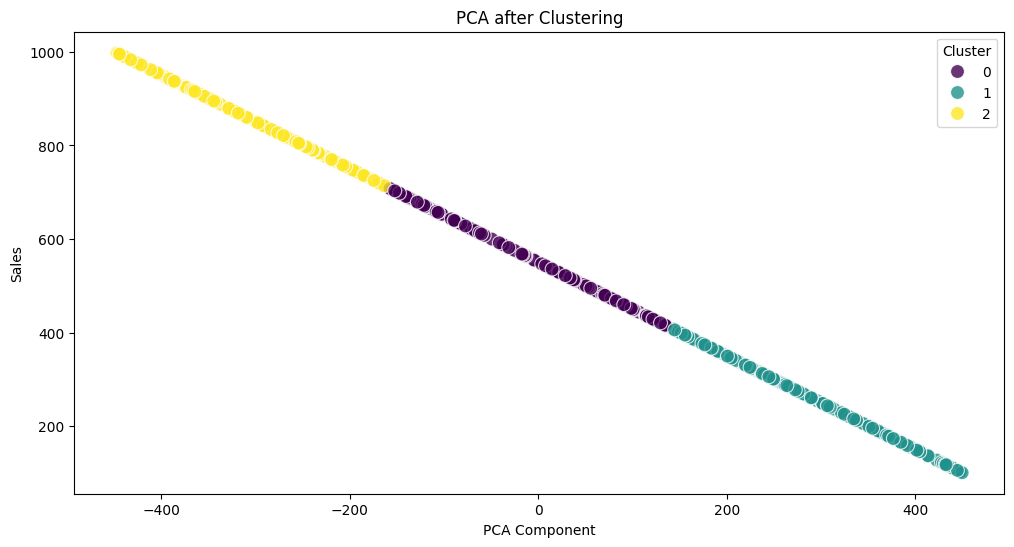

           Campaign       Channel  Sales  Cluster  PCA_Component
0  Summer Sale 2023  Social Media    556        0         -5.176
1  Summer Sale 2023     Print Ads    748        2       -197.176
2  Summer Sale 2023     Print Ads    940        2       -389.176
3  Summer Sale 2023    Online Ads    671        0       -120.176
4  Summer Sale 2023    Online Ads    426        0        124.824


In [ ]:
# Perform PCA (Principal Component Analysis) for dimensionality reduction
pca = PCA(n_components=1)
df['PCA_Component'] = pca.fit_transform(X)

# Plotting the PCA components colored by cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA_Component', y='Sales', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('PCA after Clustering')
plt.xlabel('PCA Component')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()

# Display the updated DataFrame with PCA components
print(df.head())